# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends

1. This analysis shows temperatures in cities increase the closer they are to the equator and decrease further from the equator. The regression analysis and scatter plots strongly suggests this to be true.

2. The data does not show any significant results or correlation between humidity or cloudiness in relationship to latitude.

3. This analysis indicates that wind speed seem to be generally higher in cities further from the equator.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API keys
from config import weather_api_key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | bac lieu
Processing Record 3 of Set 1 | bafra
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | buchanan
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | bowen
Processing Record 16 of Set 1 | escarcega
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | brownsville
Processing Record 23 of Set 1 | hobart
P

Processing Record 39 of Set 4 | toora-khem
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | yaan
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | negotino
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | dongli
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | khani
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | bilma
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | svetlogorsk
Processing Record 7 of Set 5 | lenger
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | bethanien
Processing Record 10 of Set 5 | bonavista
Processing Record 11 of Set 5 | coquimbo
Processing Record 12 of Set 5 | axim
Processing Re

Processing Record 30 of Set 8 | kivertsi
Processing Record 31 of Set 8 | khorixas
Processing Record 32 of Set 8 | lindas
Processing Record 33 of Set 8 | jumla
Processing Record 34 of Set 8 | san juan
Processing Record 35 of Set 8 | mangrol
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | ornskoldsvik
Processing Record 38 of Set 8 | vila
Processing Record 39 of Set 8 | mahibadhoo
Processing Record 40 of Set 8 | aguimes
Processing Record 41 of Set 8 | olafsvik
Processing Record 42 of Set 8 | praya
Processing Record 43 of Set 8 | puerto pinasco
City not found. Skipping...
Processing Record 44 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 8 | rio grande
Processing Record 46 of Set 8 | sungaipenuh
Processing Record 47 of Set 8 | teahupoo
Processing Record 48 of Set 8 | banjar
Processing Record 49 of Set 8 | shache
Processing Record 50 of Set 8 | ozark
Processing Record 1 of Set 9 | padang
Processing Record 2 of Set 9 | sorong
Pro

Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | sovetskiy
Processing Record 23 of Set 12 | formosa do rio preto
Processing Record 24 of Set 12 | mastic beach
Processing Record 25 of Set 12 | njombe
Processing Record 26 of Set 12 | bukachacha
Processing Record 27 of Set 12 | mendahara
City not found. Skipping...
Processing Record 28 of Set 12 | sisimiut
Processing Record 29 of Set 12 | el balyana
City not found. Skipping...
Processing Record 30 of Set 12 | uryupinsk
Processing Record 31 of Set 12 | thai binh
Processing Record 32 of Set 12 | cockburn town
Processing Record 33 of Set 12 | hailar
Processing Record 34 of Set 12 | khasan
Processing Record 35 of Set 12 | turan
Processing Record 36 of Set 12 | churapcha
Processing Record 37 of Set 12 | challans
Processing Record 38 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 39 of Set 12 | meridian
Processing Record 40 of Set 12 | zhigansk
Processing Record 41 of Set 12 | ahuimanu
Processing Reco

In [8]:

# Length of Latitude and Temprature

len(lat)
len(temp)

602

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          559
Lat           559
lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


In [12]:
# Export the city data into a .csv file.
city_weather_df.to_csv("output_data/cities.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("output_data/cities.csv")

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okhotsk,59.3833,143.3000,18.61,94.0,100.0,20.71,RU,1.612922e+09
1,bac lieu,9.2850,105.7244,80.87,73.0,84.0,13.00,VN,1.612922e+09
2,bafra,41.5678,35.9069,41.00,87.0,20.0,3.44,TR,1.612922e+09
3,fortuna,40.5982,-124.1573,50.00,93.0,90.0,9.22,US,1.612922e+09
4,ponta do sol,32.6667,-17.1000,57.99,70.0,70.0,1.99,PT,1.612922e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
This step has been skipped because no cities have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

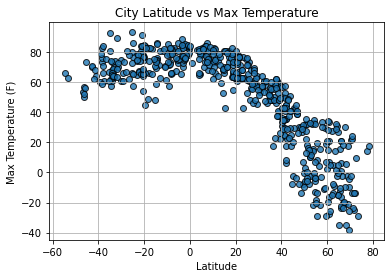

In [20]:
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0).  When you go farther from the equator towrads to the north and south the temprature will decrease

## Latitude vs. Humidity Plot

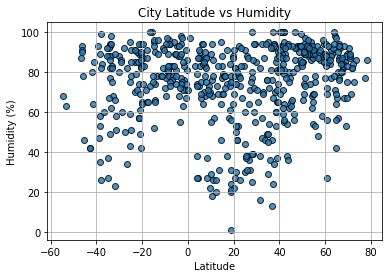

In [21]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.grid()
plt.savefig("output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between Humidity (%) vs. Latitude.  The results indicate that humidity is fairly distributed troughout the plot. We could conclude that high humidity may occer for cities far from or nearer to the equator.

## Latitude vs. Cloudiness Plot

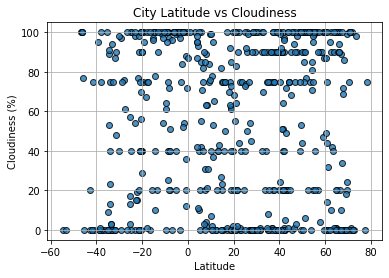

In [22]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()
plt.savefig("output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot showes the relationship between the cities cloudness and latitude. The results show that the data is fairly evenly distributed.  The conclusion we could draw is that there is no difference in cloudiness for cities near or far from the equator.

## Latitude vs. Wind Speed Plot

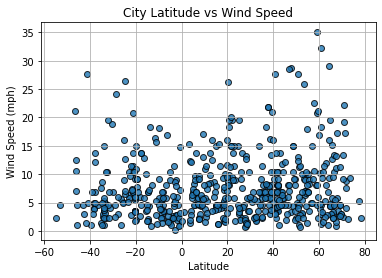

In [23]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between wind speed (mph) and latitude. The data on the plot indicates that the wind speed may increases for cities further from the equator.

## Linear Regression

In [51]:
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [52]:

# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.789167691955695
The correlation between both factors is -0.89


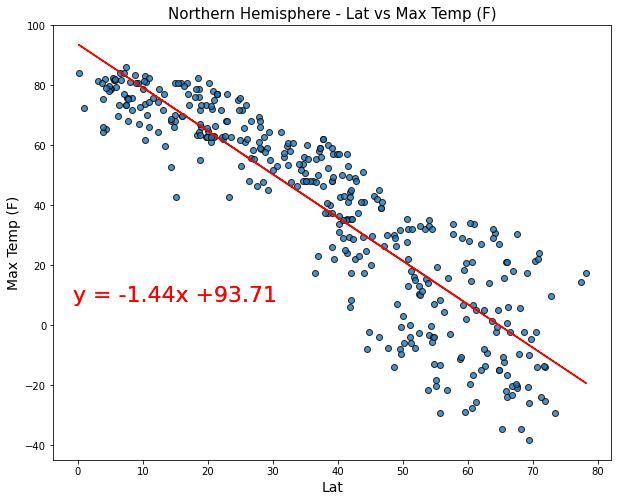

In [53]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The result from the data shows that there is a strong, negative correlation between Maximum tempreture and latitude. This means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.13795711109282513
The correlation between both factors is 0.37


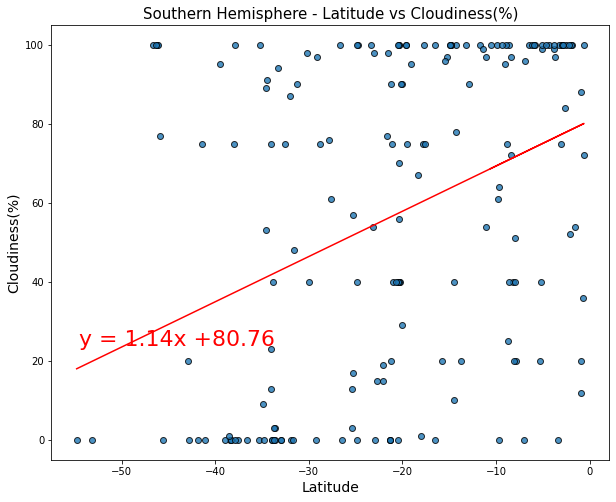

In [54]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between maximum temperature and latitude for southern hemisphere cities. The result from the data showed that there is very little correlation between maximum tempreture and latitude in the southern hemisphere cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.09768606632208238
The correlation between both factors is 0.31


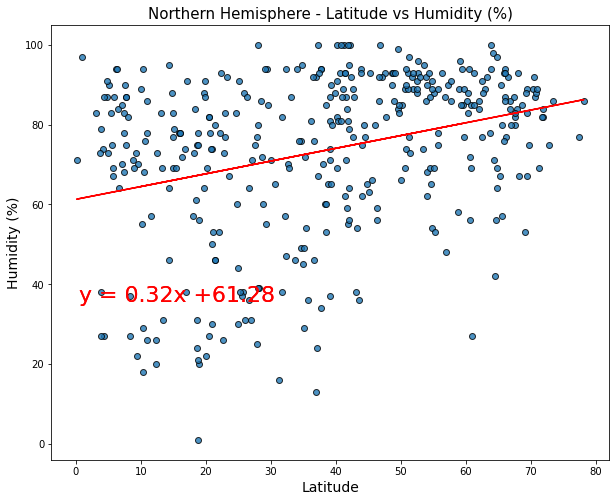

In [55]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is very little correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.09768606632208238
The correlation between both factors is 0.31


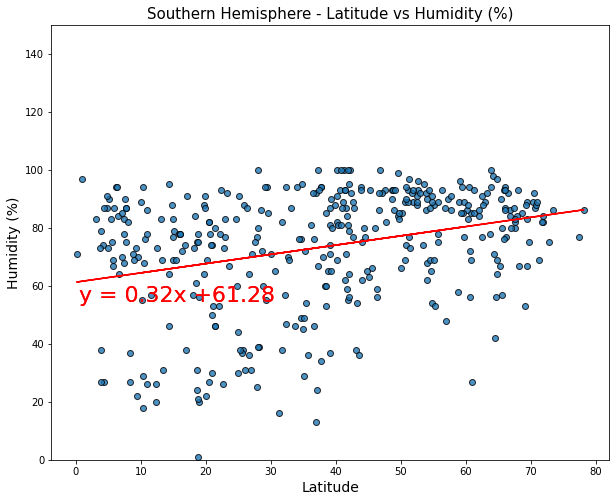

In [56]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is little correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.006023245704052218
The correlation between both factors is 0.08


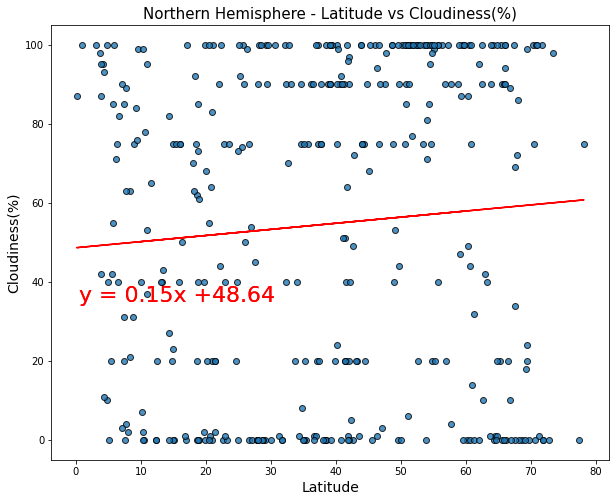

In [57]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemisphere cities. The result from the data shows that there is little correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.13795711109282513
The correlation between both factors is 0.37


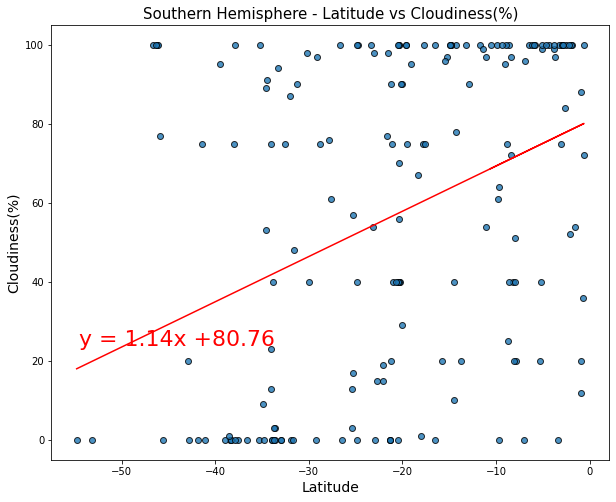

In [58]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data shows that there is little correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.006908712896967089
The correlation between both factors is 0.08


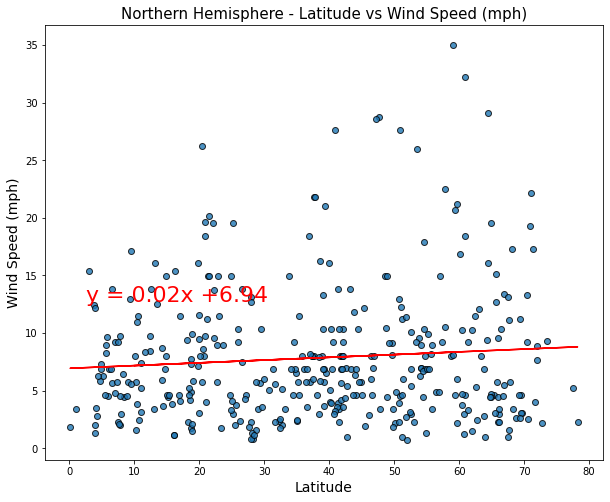

In [59]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data shows little correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.013308254837537916
The correlation between both factors is -0.12


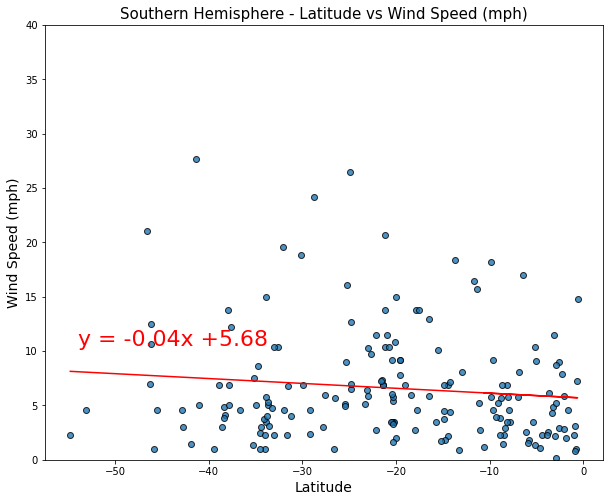

In [60]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data shows little correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.